In [3]:
# Class 8 - Lecture - More on Modelling

# July 16 - new deadline for A2 for MBAN 6110

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Plt
import matplotlib.pyplot as plt

# Import

In [7]:
# Read CSV file
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [8]:
# Bike Share for Washington DC
bikes.head()

# Season = is season for bike riding or not
# Holiday = 1 is a holiday
# Working Day
# Weather = 1 - categorical - severity
# Temp in Celsuis
# Atemp - feels like 
# Wind speed - speed of win
# Casual - people who are generally walking by and want
# Registered = number of ppl who have accounts, annual subscription
# Count = total of casual and regular users
# Hourly rental of bike rentals, at a given hour

# Influencing factor of bike rental, influence by humidity, weather, temperature

# Count - we are predicting the count rentals
# Make sure the downtown rental speed

# Casual renters - fun thing, tourists, occassion with friends/family, probably not on rush hour
# Registered - people who live in the city, such as commuters

# Probably rain or shine


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
# Convert datetime to datetime variable
bikes["datetime"] = pd.to_datetime(bikes["datetime"])

In [11]:
# Extraction - timing, hours + specific windows
# Monthly data, weekly data

bikes["hour"] = bikes["datetime"].apply(lambda x: x.hour)

In [12]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [13]:
def time_of_day(x):
    if x >=3 and x <= 9:
        return 'morning_commute'
    elif x >= 10 and x <= 14:
        return 'midday'
    elif x >= 15 and x <= 19:
        return 'evening_commute'
    elif x >= 20 and x <= 23:
        return 'after_hours'
    else:
        return 'late_night'

In [14]:
bikes["time_of_day"] = bikes["hour"].apply(time_of_day)

In [15]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,late_night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,late_night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,late_night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,morning_commute
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,morning_commute


## Hourly Analysis

<Axes: xlabel='time_of_day', ylabel='casual'>

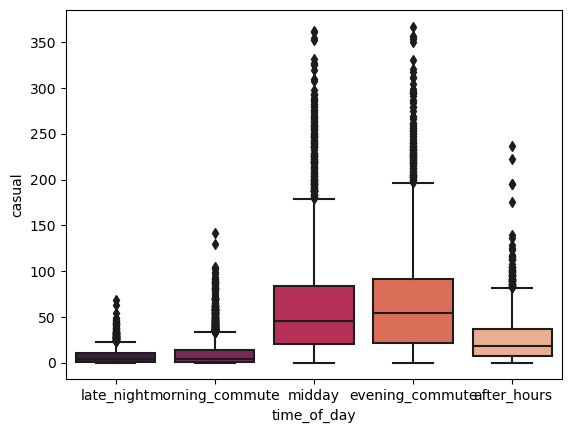

In [16]:
sns.boxplot(x = "time_of_day", y = "casual", data = bikes, palette="rocket")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'late_night'),
  Text(1, 0, 'morning_commute'),
  Text(2, 0, 'midday'),
  Text(3, 0, 'evening_commute'),
  Text(4, 0, 'after_hours')])

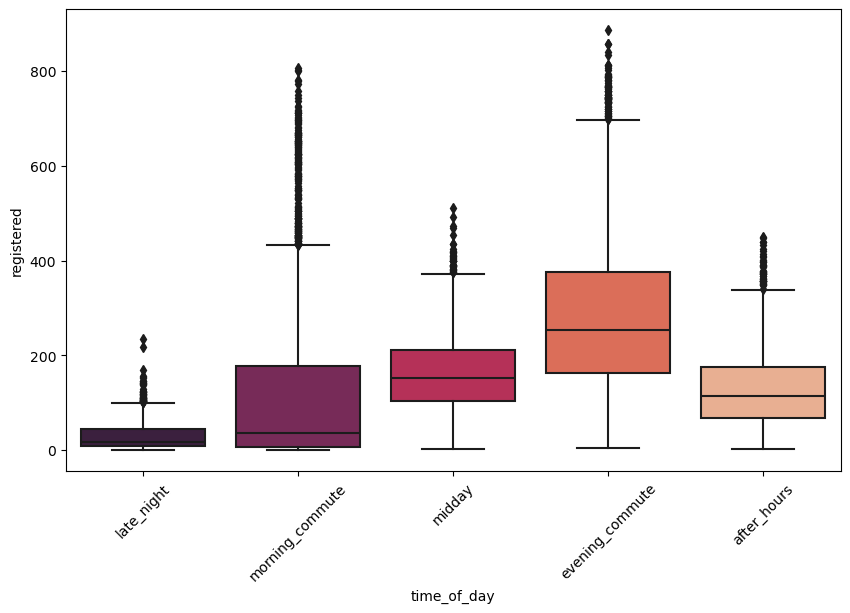

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "time_of_day", y = "registered", data = bikes, palette="rocket")
plt.xticks(rotation = 45)

<Axes: xlabel='workingday', ylabel='count'>

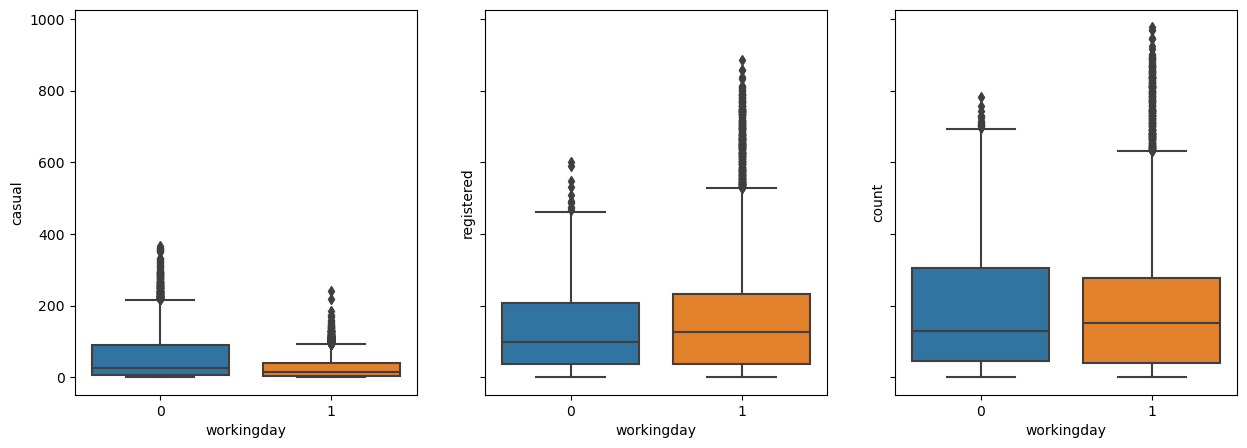

In [18]:
# Other variables
# Check each of the 3 - casual, registered, count, etc to see which one makes sense for linear regression
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='workingday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='workingday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='workingday', y='count', data=bikes, ax=ax3)


# Fall, Spring, Summer popular - for Casual
# Registered - more consistent, commuters
# Better for registered


# Weather
# Season does not matter for registered users
# Weather seems to have an impact, i.e. take transit

# Season and Weather maybe have an influence

# Holiday - not much, pretty similar

# Workday
# Causal  - use it more when 0, for non-working day
# Workers - same (registered) but more outliers

In [19]:
bikes["weekday"] = bikes["datetime"].apply(lambda x: x.weekday())

<Axes: xlabel='weekday', ylabel='count'>

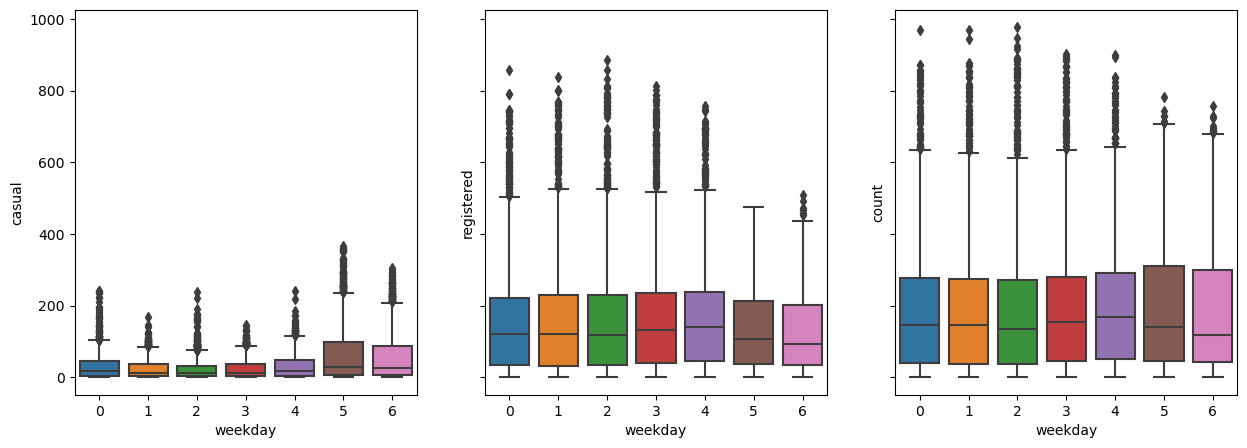

In [20]:
# Check each of the 3 - casual, registered, count, etc to see which one makes sense for linear regression
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3)

# 5 = Saturday, 6 = Sunday
# We see that casual, Saturday has more rentals, and Sunday has more rentals
# Registered = more consistent, but for casual, more variability for the median


In [21]:
# Roughly how many hourly, or more predictable dataset
# Aggregated on a daily basis - daily bike share data

# Make this:

bikes_daily = bikes.set_index("datetime")

In [22]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,late_night,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,late_night,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,late_night,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,morning_commute,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,morning_commute,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,after_hours,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,after_hours,2


In [23]:
# resample D - daily
bikes_daily = bikes_daily.resample("D").agg({'season':'max', 'holiday': 'max', 'workingday': 'max', 'weather': 'mean',
                              'temp': 'mean', 'atemp': 'mean', 'humidity': 'mean', 'windspeed': 'mean',
                              'casual': 'sum',
                              'registered': 'sum',
                              'count': 'sum',
                              'weekday': 'max'});

# Bike is rented for 30 mins
# May show up as two bikes being rented

In [24]:
# Resampled
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985,5.0
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801,6.0
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349,0.0
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562,1.0
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0


<Axes: xlabel='weekday', ylabel='count'>

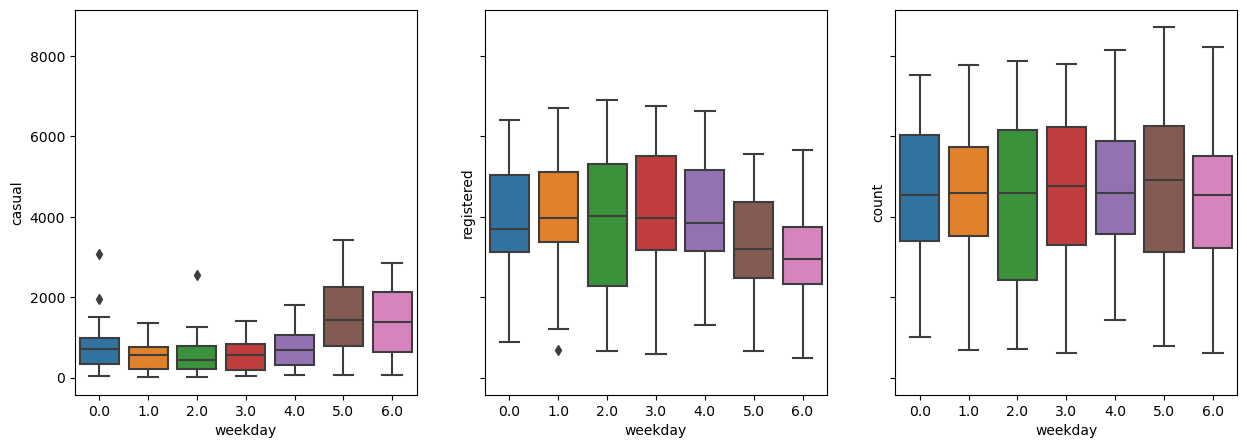

In [25]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes_daily, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes_daily, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes_daily, ax=ax3)

<Axes: xlabel='temp', ylabel='count'>

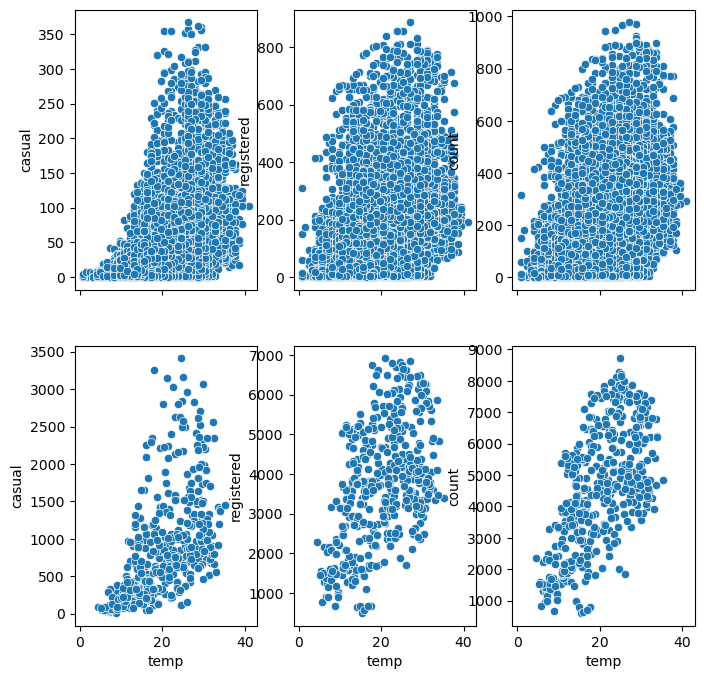

In [26]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', data=bikes_daily, ax=ax6)

<Axes: xlabel='temp', ylabel='count'>

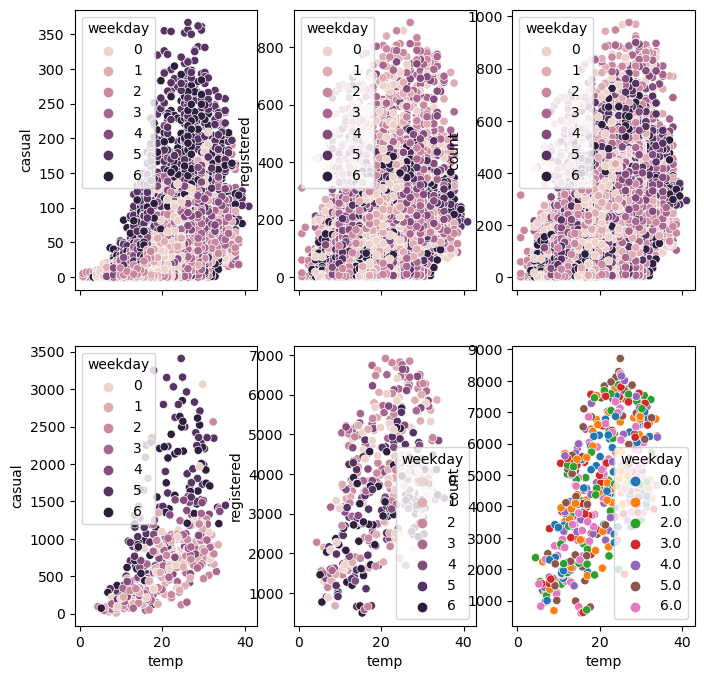

In [27]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', hue = "weekday", data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', hue = "weekday", data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', hue = "weekday", data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', hue = "weekday", data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', hue = "weekday", data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', hue = "weekday", data=bikes_daily, ax=ax6, palette = "tab10")

# If you looked without the hue for weekday for causal, you'd see the highest number of bike rental
# It's not just causal and temperature. Weekday can segment as well.

<Axes: xlabel='temp', ylabel='count'>

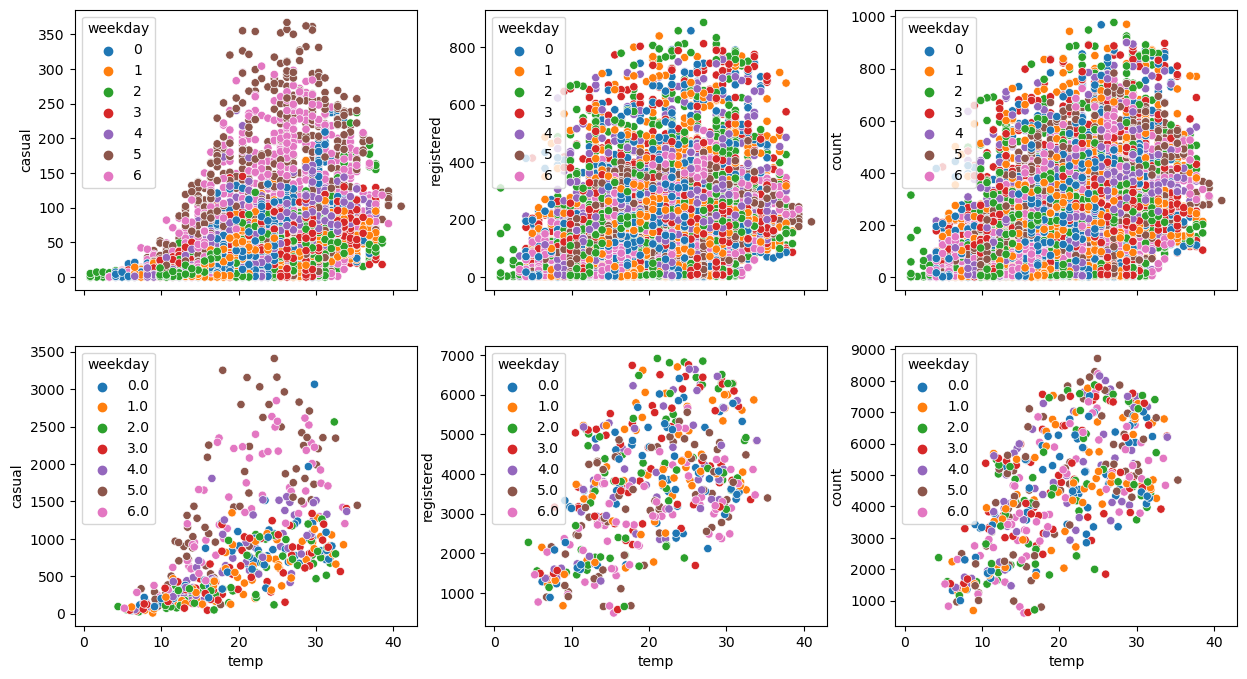

In [28]:
# temp and rentals

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', hue='weekday', data=bikes, ax=ax1, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes, ax=ax2, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes, ax=ax3, palette="tab10")
sns.scatterplot(x='temp', y='casual',  hue='weekday', data=bikes_daily, ax=ax4, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes_daily, ax=ax5, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes_daily, ax=ax6, palette="tab10")

In [29]:
# We are not noticing the relationship between independent variables
# We do want to see the relationship
# Day of the week and temperature are not related
# They're influential

# Feature importance 
# Select set of variables are most impactful, then you can look at feature importance. Don't skip this step.


In [34]:
# Linear Regression
# Statistical analysis for statsmodel
# Not any cross-validation

results = ols("casual ~ temp", data = bikes).fit()

In [36]:
# Ordinary Least Squares Regression
print(results.summary())

# We care about R-Squared, Adj-resquared, and Residual analysis
# Overall goodness of fit
# Do you have the right independent varaibles to explain the variability of data
# Closer to 1 is better

# y = 2.9951x + 5847
# This would be for our particular model
# This y-intercept, we rent negative bikes when temperature is zero, sometimes the y-int doesn't make sense
# We also care about p-value, as long as it's less than 0.05
# we chose statistically significant variable
# Although it's not enough, as it's statistically significant
# It can change from combination of variables, sometimes for example it is, but after adding more vars, it loses it
# Different configurations
# Confidence interval - at 95% confidence interval, where the confidence interval

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:01:31   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

In [49]:
# When it's in a daily cadence, it is better than hourly cadence.
# Could filter out with daily dataset


results = ols("casual ~ temp", data = bikes_daily[~bikes_daily["weekday"].isin([5,6])]).fit()
# Is not in, ~ symbol
# We get a good r-squared values, already by isolating 

In [50]:
print(results.summary())
#  Summary

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           9.87e-52
Time:                        21:12:25   Log-Likelihood:                -2310.9
No. Observations:                 324   AIC:                             4626.
Df Residuals:                     322   BIC:                             4633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.1496     49.419     -4.617      0.0

In [51]:
# Added categorical variable

# Create dummy variables
bikes_daily.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0
2012-12-18,4.0,0.0,1.0,1.208333,16.844167,20.485417,66.625000,14.834079,433,5124,5557,1.0
2012-12-19,4.0,0.0,1.0,1.000000,13.632500,17.108125,62.541667,12.334142,333,4934,5267,2.0


In [52]:
bikes_daily.dropna(inplace = True)

In [55]:
bikes_daily["season"].unique()

array([1., 2., 3., 4.])

In [60]:
bikes_daily["workingday"].value_counts()
# There is no unique

workingday
1.0    311
0.0    145
Name: count, dtype: int64

In [74]:
# Convert season
# every single categorical variable, otherwise it will interpret 

# You must do this for every categorical variables
season_dummies = pd.get_dummies(bikes_daily["season"])

season_dummies.rename(columns={1: "season1", 2:"season2", 3:"season3", 4: "season4"}, inplace = True)

In [75]:
# Concat
bikes_daily = pd.concat([bikes_daily, season_dummies], axis = 1)

In [ ]:
# Now, you will have y = ax1 + bx2 + cx3 + dx4 + e + y-int
# For cat variables, the coefficient values are either 1 or 0

# temperature vs. bikes
# y = 10temp + 5season1 + 10season2 + 15season3 + 20season4
# An observation cannot belong in multiple seasons

# 

In [76]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,3.0,4.0,1.0,2.0,3.0,4.0,season1,season2,season3,season4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,...,False,False,True,False,False,False,True,False,False,False
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,...,False,False,True,False,False,False,True,False,False,False
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,...,False,False,True,False,False,False,True,False,False,False
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,...,False,False,True,False,False,False,True,False,False,False
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,...,False,True,False,False,False,True,False,False,False,True
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,...,False,True,False,False,False,True,False,False,False,True
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,...,False,True,False,False,False,True,False,False,False,True


In [70]:
# y = -228 + 41.78x + 50season1 + 20season2

# Model predicts 607 bikes
# y = -228 + 41.78()

# from the formula...

bikes_daily[(~bikes_daily["weekday"].isin([5,6]) & (bikes_daily["temp"]> 19) & (bikes_daily["temp"] < 21))]["casual"].mean()

# The mean from the data is 725 bikes

725.9444444444445

In [71]:
# You want to add n-1 categories
# Don't add all 4 of them, because the 4th one doesn't add any value to this
bikes_daily[(~bikes_daily['weekday'].isin([5,6])) & (bikes_daily['temp'] >19) & (bikes_daily ['temp'] < 21)]['casual'].mean()

725.9444444444445

In [72]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,...,False,False,True,False,False,False,True,False,False,False
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,...,False,False,True,False,False,False,True,False,False,False
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,...,False,False,True,False,False,False,True,False,False,False
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,...,False,False,True,False,False,False,True,False,False,False
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,...,False,True,False,False,False,True,False,False,False,True
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,...,False,True,False,False,False,True,False,False,False,True
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,...,False,True,False,False,False,True,False,False,False,True


In [77]:
results = ols("casual ~ temp + season1 + season2 + season3", data = bikes_daily[~bikes_daily["weekday"].isin([5,6])]).fit()

In [ ]:
# Not normally distributed data or distribution
# Could also sometimes lead to higher p-value

# More digging would be required
# Drop the whole thing, or keep the whole thing (i.e. all 3 seasons). DROP THE WHOLE THING OR KEEP THE WHOLE THING.


# Y = -99.18 + 33.84temp - 81.99

# P-Values are not good for these season1, season2, and season3.

In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     88.17
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           2.24e-50
Time:                        21:35:52   Log-Likelihood:                -2305.6
No. Observations:                 324   AIC:                             4621.
Df Residuals:                     319   BIC:                             4640.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -99.1818     77.954     

In [84]:
# Example
predicted_vals = results.predict(bikes_daily[['temp','season1','season2','season3']])

# For the temperature of that day, taken the season value, and made a prediction
# From Day 1, we rented 296 bikes, but we actually 331 was rented. The residual is the difference.
# We need to understand how far off it is.
# From scatterplot, we know the relationship is not linear.


In [87]:
residuals = bikes_daily["casual"] - predicted_vals

In [88]:
residuals

datetime
2011-01-01     34.692476
2011-01-02   -192.099380
2011-01-03     28.746366
2011-01-04     11.701473
2011-01-05    -51.696540
                 ...    
2012-12-15    416.450623
2012-12-16    134.269040
2012-12-17   -234.507450
2012-12-18    -37.785999
2012-12-19    -29.110591
Length: 456, dtype: float64

In [86]:
predicted_vals

datetime
2011-01-01    296.307524
2011-01-02    323.099380
2011-01-03     91.253634
2011-01-04     96.298527
2011-01-05    133.696540
                 ...    
2012-12-15    350.549377
2012-12-16    403.730960
2012-12-17    446.507450
2012-12-18    470.785999
2012-12-19    362.110591
Length: 456, dtype: float64

In [85]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,3.0,4.0,1.0,2.0,3.0,4.0,season1,season2,season3,season4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,...,False,False,True,False,False,False,True,False,False,False
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,...,False,False,True,False,False,False,True,False,False,False
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,...,False,False,True,False,False,False,True,False,False,False
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,...,False,False,True,False,False,False,True,False,False,False
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,...,False,True,False,False,False,True,False,False,False,True
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,...,False,True,False,False,False,True,False,False,False,True
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,...,False,True,False,False,False,True,False,False,False,True


In [105]:
# First square the residuals
# Take the sqrt of the mean
# We don't know if the residuals are bad yet.
residuals ** 2

# Root mean square error
RMSE = np.mean(np.sqrt(residuals ** 2))

# Over 30% is generally bad. This is basically half

# Compare to the conditions
avg_rentals = bikes_daily[(~bikes_daily['weekday'].isin([5,6]))]['casual'].mean()

# Compare the mean and the the residuals 


In [104]:
RMSE

390.1489916309738

In [106]:
avg_rentals

621.2006172839506

/Users/christine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

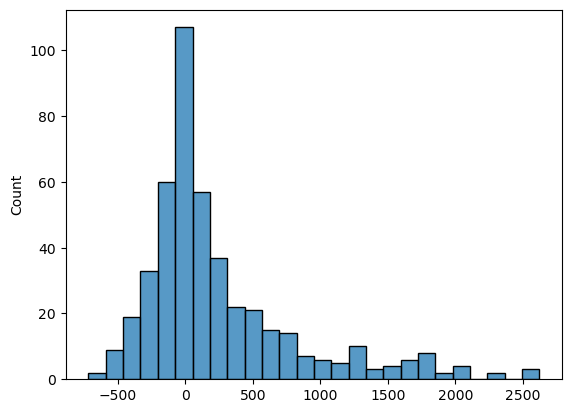

In [107]:
sns.histplot(residuals)

# Skewed distribution - if average error or median error is zero
# Model tends to overpredict a lot
# It has a long tail, predict higher and over the mean a lot


In [ ]:
plt.scatter(bikes_daily[(~bikes_daily['weekday'].isin([5,6]))]['casual'])

In [108]:
final_residuals = pd.concat([bikes_daily['casual'],predicted_vals, residuals], axis=1)

In [113]:
final_residuals

,casual,0,1
datetime,,,
2011-01-01,331,296.307524,34.692476
2011-01-02,131,323.099380,-192.099380
2011-01-03,120,91.253634,28.746366
2011-01-04,108,96.298527,11.701473
2011-01-05,82,133.696540,-51.696540
...,...,...,...
2012-12-15,767,350.549377,416.450623
2012-12-16,538,403.730960,134.269040
2012-12-17,212,446.507450,-234.507450


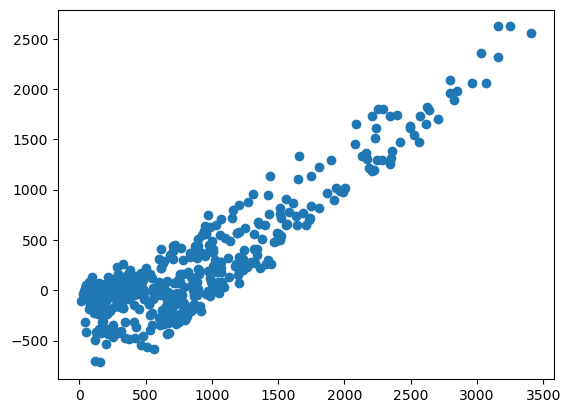

In [112]:
plt.scatter(final_residuals["casual"], final_residuals[1])

# Really biased set of residuals
# Co-related to the actual valiues, when we have higher bike rentals, our model tends to over-predict by a lot
# When lower bike rentals, it tends to underpredict

# Linear regression - high bias, needs something that is distributed well for residuals
# Try to normalize the data

In [ ]:
# normalize and standardize
# Normalizatin - Linear regression
# Standardzie - for every model